In [6]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.impute import SimpleImputer

In [7]:
house=pd.read_csv(r'https://raw.githubusercontent.com/CodyDong/schulich_data_science/main/Dataset/kc_house_data.csv')

In [25]:
house.info()
house.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  datetime64[ns]
 15  yr_renovated   2161

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,built_yrs
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1970-01-01 00:00:00.000001955,0,98178,47.5112,-122.257,1340,5650,44.810959
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1970-01-01 00:00:00.000001951,1991,98125,47.7210,-122.319,1690,7639,44.967123
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1970-01-01 00:00:00.000001933,0,98028,47.7379,-122.233,2720,8062,45.180822
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1970-01-01 00:00:00.000001965,0,98136,47.5208,-122.393,1360,5000,44.967123
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1970-01-01 00:00:00.000001987,0,98074,47.6168,-122.045,1800,7503,45.161644


In [15]:
house.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,built_yrs
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,1788.390691,291.509045,1970-01-01 00:00:00.000001971,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,44.855324
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,290.000000,0.000000,1970-01-01 00:00:00.000001900,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,44.361644
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,1190.000000,0.000000,1970-01-01 00:00:00.000001951,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,44.583562
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,1560.000000,0.000000,1970-01-01 00:00:00.000001975,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,44.819178
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,2210.000000,560.000000,1970-01-01 00:00:00.000001997,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,45.158904
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,9410.000000,4820.000000,1970-01-01 00:00:00.000002015,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,45.430137
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,828.090978,442.575043,NaN,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.309721


In [32]:
house['grade'].describe()

count    21077.000000
mean         7.623096
std          1.137365
min          1.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

In [10]:
house['date'] = pd.to_datetime(house['date'])
house['yr_built'] = pd.to_datetime(house['yr_built'])

<Axes: ylabel='bedrooms'>

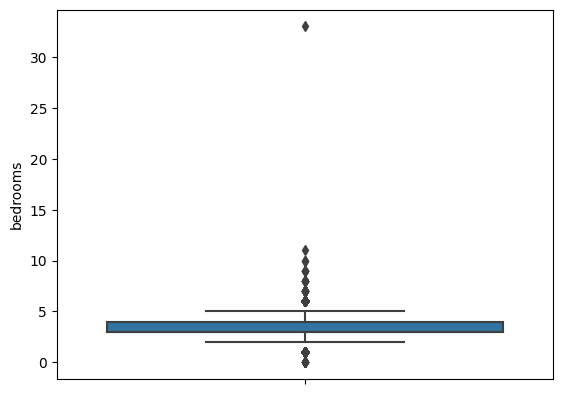

In [26]:
sns.boxplot(data=house,y='bedrooms')

<Axes: ylabel='bathrooms'>

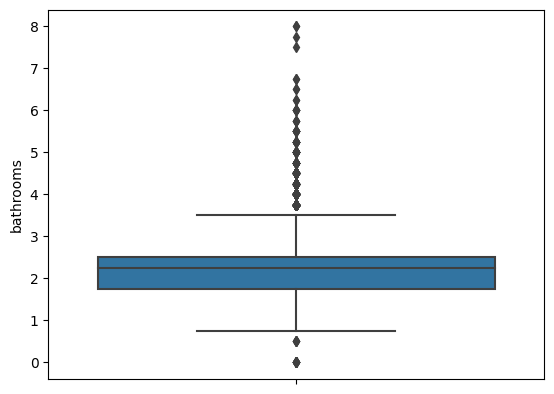

In [27]:
sns.boxplot(data=house,y='bathrooms')

<Axes: ylabel='sqft_living'>

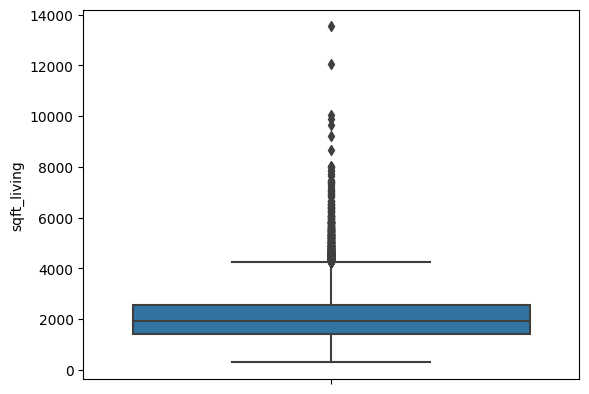

In [28]:
sns.boxplot(data=house,y='sqft_living')

<Axes: ylabel='price'>

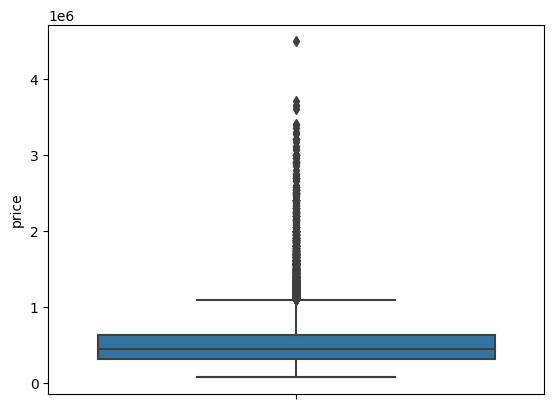

In [33]:
sns.boxplot(data=house,y='price')

<Axes: xlabel='sqft_living', ylabel='price'>

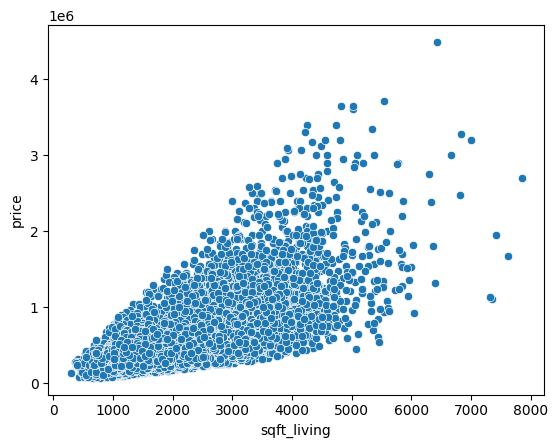

In [36]:
sns.scatterplot(data= house, y= 'price',x='sqft_living')

<Axes: xlabel='sqft_lot', ylabel='price'>

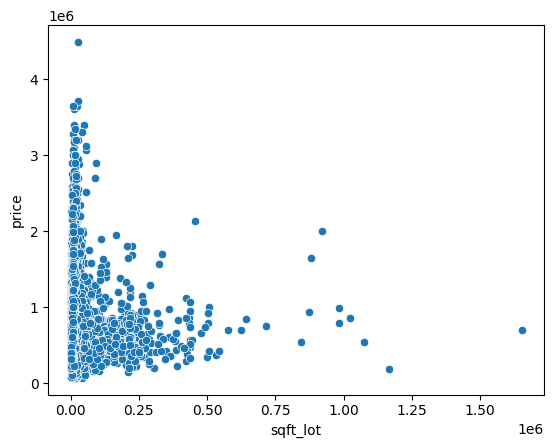

In [37]:
sns.scatterplot(data= house, y= 'price',x='sqft_lot')

<Axes: xlabel='built_yrs', ylabel='price'>

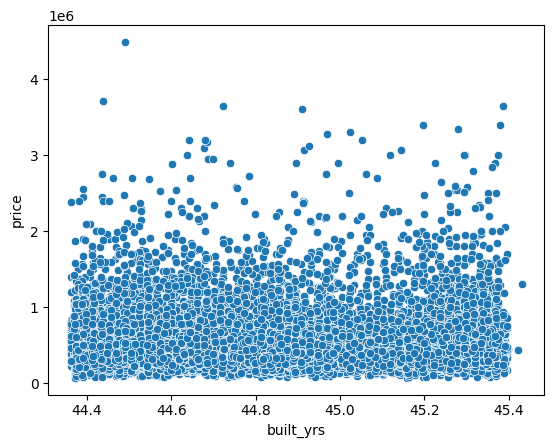

In [42]:
sns.scatterplot(data= house, y= 'price',x='built_yrs')

In [30]:
house.drop(house[house['bedrooms']>5].index, inplace=True)
house.drop(house[house['bathrooms']>4].index, inplace=True)

In [31]:
house.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,built_yrs
count,2.107700e+04,21077,2.107700e+04,21077.000000,21077.000000,21077.000000,2.107700e+04,21077.000000,21077.000000,21077.000000,...,21077.000000,21077.000000,21077,21077.000000,21077.000000,21077.000000,21077.000000,21077.000000,21077.000000,21077.000000
mean,4.589436e+09,2014-10-29 09:24:44.442757376,5.236854e+05,3.313138,2.073765,2031.654600,1.483573e+04,1.487546,0.006832,0.220572,...,1753.570005,278.084595,1970-01-01 00:00:00.000001970,81.907957,98078.086255,47.559335,-122.213886,1969.129383,12592.974617,44.855869
min,1.200019e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,290.000000,0.000000,1970-01-01 00:00:00.000001900,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,44.361644
25%,2.125049e+09,2014-07-22 00:00:00,3.200000e+05,3.000000,1.500000,1410.000000,5.015000e+03,1.000000,0.000000,0.000000,...,1180.000000,0.000000,1970-01-01 00:00:00.000001951,0.000000,98033.000000,47.468500,-122.329000,1480.000000,5100.000000,44.583562
50%,3.905000e+09,2014-10-16 00:00:00,4.470550e+05,3.000000,2.250000,1890.000000,7.568000e+03,1.000000,0.000000,0.000000,...,1540.000000,0.000000,1970-01-01 00:00:00.000001975,0.000000,98065.000000,47.570800,-122.231000,1830.000000,7600.000000,44.819178
75%,7.334501e+09,2015-02-17 00:00:00,6.300000e+05,4.000000,2.500000,2500.000000,1.051300e+04,2.000000,0.000000,0.000000,...,2170.000000,530.000000,1970-01-01 00:00:00.000001996,0.000000,98118.000000,47.678300,-122.125000,2340.000000,10018.000000,45.158904
max,9.900000e+09,2015-05-27 00:00:00,4.489000e+06,5.000000,4.000000,7850.000000,1.651359e+06,3.500000,1.000000,4.000000,...,7850.000000,3500.000000,1970-01-01 00:00:00.000002015,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,45.430137
std,2.878146e+09,NaN,3.204812e+05,0.826966,0.710504,842.102643,4.083060e+04,0.539086,0.082376,0.741292,...,777.363436,423.187988,NaN,395.956022,53.505230,0.139168,0.141238,666.139267,26433.136383,0.309764


In [11]:
house['condition'].describe()

count    21613.000000
mean         3.409430
std          0.650743
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

In [12]:
house['waterfront'].describe()

count    21613.000000
mean         0.007542
std          0.086517
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [41]:
house['built_yrs']= (house['date'] -house['yr_built'])/np.timedelta64(1,'Y')
house['built_yrs']

0        44.810959
1        44.967123
2        45.180822
3        44.967123
4        45.161644
           ...    
21608    44.413699
21609    45.175342
21610    44.504110
21611    45.071233
21612    44.816438
Name: built_yrs, Length: 21077, dtype: float64

In [43]:
house['year'] = house['date'].dt.year
house['year']

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21608    2014
21609    2015
21610    2014
21611    2015
21612    2014
Name: year, Length: 21077, dtype: int32

In [45]:
house['month'] = house['date'].dt.month
house['month']

0        10
1        12
2         2
3        12
4         2
         ..
21608     5
21609     2
21610     6
21611     1
21612    10
Name: month, Length: 21077, dtype: int32